# Training Setup for Object Detector


In [ ]:
ls

sample_data/


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Dec  6 21:04:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    51W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/dbvenkat/MITOS_WSI_CMC.git

Cloning into 'MITOS_WSI_CMC'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 227 (delta 8), reused 20 (delta 5), pack-reused 204
Receiving objects: 100% (227/227), 106.49 MiB | 27.15 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
ls

MITOS_WSI_CMC/  sample_data/


In [ ]:
cd MITOS_WSI_CMC/

/content/MITOS_WSI_CMC


In [ ]:
ls

capstone_EDA.ipynb          README.md
capstone_EDA_nr.ipynb       results/
capstone_EDA_sv.ipynb       RetinaNet-CMC-CODAEL.ipynb
databases/                  RetinaNet-CMC-MEL.ipynb
data_loader.py              RetinaNet-CMC-ODAEL.ipynb
Evaluation.ipynb*           sample_anno2.png
Inference-RetinaNet-512.py  Setup.ipynb
lib/                        title_CMC.png
model/                      WSI/
PatchClassifier/


In [ ]:
import urllib.request
import os
from tqdm import tqdm
downloadableFiles = {'WSI/deb768e5efb9d1dcbc13.svs' : #18
                         'https://ndownloader.figshare.com/files/22407414?private_link=be072bf30fd3f63b03cc',
                     'WSI/d37ab62158945f22deed.svs' : #19
                         'https://ndownloader.figshare.com/files/22585835?private_link=be072bf30fd3f63b03cc',
                     'WSI/022857018aa597374b6c.svs': #1,
                         'https://ndownloader.figshare.com/files/22407537?private_link=be072bf30fd3f63b03cc',
                     'WSI/69a02453620ade0edefd.svs': #2
                          'https://ndownloader.figshare.com/files/22407411?private_link=be072bf30fd3f63b03cc', 
                     'WSI/a8773be388e12df89edd.svs': #3
                          'https://ndownloader.figshare.com/files/22407540?private_link=be072bf30fd3f63b03cc',
                     'WSI/c4b95da36e32993289cb.svs': #4
                          'https://ndownloader.figshare.com/files/22407552?private_link=be072bf30fd3f63b03cc',
                     'WSI/3d3d04eca056556b0b26.svs': #5
                          'https://ndownloader.figshare.com/files/22407585?private_link=be072bf30fd3f63b03cc',
                     'WSI/d0423ef9a648bb66a763.svs': #6
                          'https://ndownloader.figshare.com/files/22407624?private_link=be072bf30fd3f63b03cc',
                     'WSI/50cf88e9a33df0c0c8f9.svs': #7
                          'https://ndownloader.figshare.com/files/22407531?private_link=be072bf30fd3f63b03cc',
                     'WSI/084383c18b9060880e82.svs': #8
                         'https://ndownloader.figshare.com/files/22407486?private_link=be072bf30fd3f63b03cc',
                     'WSI/4eee7b944ad5e46c60ce.svs': #9
                         'https://ndownloader.figshare.com/files/22407528?private_link=be072bf30fd3f63b03cc',
                     'WSI/2191a7aa287ce1d5dbc0.svs' : #10
                         'https://ndownloader.figshare.com/files/22407525?private_link=be072bf30fd3f63b03cc',
                     'WSI/13528f1921d4f1f15511.svs' : #11
                         'https://ndownloader.figshare.com/files/22407519?private_link=be072bf30fd3f63b03cc',
                     'WSI/2d56d1902ca533a5b509.svs' : #12
                         'https://ndownloader.figshare.com/files/22407522?private_link=be072bf30fd3f63b03cc',
                     'WSI/460906c0b1fe17ea5354.svs' : #13
                         'https://ndownloader.figshare.com/files/22407447?private_link=be072bf30fd3f63b03cc',
                     'WSI/da18e7b9846e9d38034c.svs' : #14
                         'https://ndownloader.figshare.com/files/22407453?private_link=be072bf30fd3f63b03cc',
                     'WSI/72c93e042d0171a61012.svs' : #15
                         'https://ndownloader.figshare.com/files/22407456?private_link=be072bf30fd3f63b03cc',
                     'WSI/b1bdee8e5e3372174619.svs' : #16
                         'https://ndownloader.figshare.com/files/22407423?private_link=be072bf30fd3f63b03cc',
                     'WSI/fa4959e484beec77543b.svs' : #17
                         'https://ndownloader.figshare.com/files/22407459?private_link=be072bf30fd3f63b03cc',
                     'WSI/e09512d530d933e436d5.svs' : #20
                         'https://ndownloader.figshare.com/files/22407465?private_link=be072bf30fd3f63b03cc',
                     'WSI/d7a8af121d7d4f3fbf01.svs' : #21
                         'https://ndownloader.figshare.com/files/22407477?private_link=be072bf30fd3f63b03cc',
                    }

# Create folder for WSI if nonexistant
if not os.path.isdir('WSI'):
    os.mkdir('WSI')

tqdm.write('Downloading all files from figshare - take a coffee and sit down, this will take some while, we are downloading above 37GB ...')
    

from time import sleep    
sleep(0.5)

import requests

                    
for fname in tqdm(list(downloadableFiles.keys())):
    urllib.request.urlretrieve(downloadableFiles[fname],fname)


  0%|          | 0/21 [00:07<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd ..

/content


In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/  Othercomputers/


In [ ]:
cd Othercomputers

/content/drive/Othercomputers


In [ ]:
ls

'My Mac'/


In [ ]:
cd My\ Mac

/content/drive/Othercomputers/My Mac


In [ ]:
ls

capstone/


In [ ]:
cd capstone

/content/drive/Othercomputers/My Mac/capstone


In [ ]:
ls

MITOS_WSI_CMC/


In [ ]:
cd MITOS_WSI_CMC

/content/drive/Othercomputers/My Mac/capstone/MITOS_WSI_CMC


In [ ]:
ls

capstone_EDA.ipynb          lib/              RetinaNet-CMC-CODAEL.ipynb
capstone_EDA_nr.ipynb       model/            RetinaNet-CMC-MEL.ipynb
capstone_EDA_sv.ipynb       models/           RetinaNet-CMC-ODAEL.ipynb
databases/                  PatchClassifier/  sample_anno2.png
data_loader.py              __pycache__/      Setup.ipynb
Evaluation.ipynb            README.md         title_CMC.png
Inference-RetinaNet-512.py  results/          WSI/


In [ ]:
ls /content/MITOS_WSI_CMC

In [ ]:
cd WSI

/content/drive/Othercomputers/My Mac/capstone/MITOS_WSI_CMC/WSI


Copy the whole slide images from mounted Google drive folder (WSI) to session storage. This is needed to ensure the training does not get interrupted with a "breached quota" error. 

In [ ]:
cp *.svs /content/MITOS_WSI_CMC/WSI

In [ ]:
ls

022857018aa597374b6c.svs  4eee7b944ad5e46c60ce.svs  d0423ef9a648bb66a763.svs
084383c18b9060880e82.svs  50cf88e9a33df0c0c8f9.svs  d37ab62158945f22deed.svs
13528f1921d4f1f15511.svs  69a02453620ade0edefd.svs  d7a8af121d7d4f3fbf01.svs
2191a7aa287ce1d5dbc0.svs  72c93e042d0171a61012.svs  da18e7b9846e9d38034c.svs
2d56d1902ca533a5b509.svs  a8773be388e12df89edd.svs  deb768e5efb9d1dcbc13.svs
3d3d04eca056556b0b26.svs  b1bdee8e5e3372174619.svs  e09512d530d933e436d5.svs
460906c0b1fe17ea5354.svs  c4b95da36e32993289cb.svs  fa4959e484beec77543b.svs


In [ ]:
cd /content/MITOS_WSI_CMC/WSI

/content/MITOS_WSI_CMC/WSI


In [ ]:
pwd

'/content/MITOS_WSI_CMC/WSI'

In [ ]:
ls

022857018aa597374b6c.svs  4eee7b944ad5e46c60ce.svs  d0423ef9a648bb66a763.svs
084383c18b9060880e82.svs  50cf88e9a33df0c0c8f9.svs  d37ab62158945f22deed.svs
13528f1921d4f1f15511.svs  69a02453620ade0edefd.svs  d7a8af121d7d4f3fbf01.svs
2191a7aa287ce1d5dbc0.svs  72c93e042d0171a61012.svs  da18e7b9846e9d38034c.svs
2d56d1902ca533a5b509.svs  a8773be388e12df89edd.svs  deb768e5efb9d1dcbc13.svs
3d3d04eca056556b0b26.svs  b1bdee8e5e3372174619.svs  e09512d530d933e436d5.svs
460906c0b1fe17ea5354.svs  c4b95da36e32993289cb.svs  fa4959e484beec77543b.svs


In [ ]:
!pip install SlideRunner
!pip install SlideRunner_dataAccess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511 kB 12.6 MB/s 
     |████████████████████████████████| 2.0 MB 83.4 MB/s 
     |████████████████████████████████| 8.4 MB 2.8 MB/s 
     |████████████████████████████████| 338 kB 92.3 MB/s 
     |████████████████████████████████| 98 kB 9.0 MB/s 
     |████████████████████████████████| 361 kB 93.5 MB/s 
     |████████████████████████████████| 59.9 MB 114.6 MB/s 
  Created wheel for openslide-python: filename=openslide_python-1.2.0-cp38-cp38-linux_x86_64.whl size=27718 sha256=4d3623bca4eda16825835ad5869baf496f2cb2119990fc67ef917d5b7bc13485
  Stored in directory: /root/.cache/pip/wheels/ae/74/4e/f8654d229eb249d1345e3df0191030ad77e7a6a2114df7cd28
Successfully built openslide-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████

In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  MITOS_WSI_CMC/  sample_data/


In [ ]:
cd MITOS_WSI_CMC

/content/MITOS_WSI_CMC


In [ ]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [2,234 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:13 https://developer.download

In [ ]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 14.3 MB/s 
     |████████████████████████████████| 355 kB 88.7 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=a4915de2af22e39b9e4755f78baed840e1a92e62fa55cc1d9a09773fae148651
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.10
    Uninstalling fastai-2.7.10:
      Successfully uninstalled fastai-2.7.10


Here an object detector is trained on 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sqlite3
import numpy as np
from SlideRunner.dataAccess.database import Database
from tqdm import tqdm
from pathlib import Path
import openslide
import time
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from random import randint
# path_to_module = '/content/gdrive/MyDrive/GitHub/MITOS_WSI_CMC/'
# path_to_module = '/content/drive/Othercomputers/My Mac/capstone/MITOS_WSI_CMC'
# sys.path.append(path_to_module)
from data_loader import *
from lib.callbacks import BBLossMetrics, BBMetrics, PascalVOCMetric
from lib.object_detection_helper import *
from model.RetinaNetFocalLoss import RetinaNetFocalLoss
from model.RetinaNet import RetinaNet
from lib.sampling import get_slides
size=512
path = Path('./')

database = Database()
database.open(str(path/'./databases/MITOS_WSI_CMC_COADEL_TR.sqlite'))

slidelist_test_1 = ['14','18','3','22','10','15','21']
slidelist_test_2 = ['1','20','17','5','2','11','16']
slidelist_test_3 = ['13','7','19','8','6','9', '12']
slidelist_test = slidelist_test_1

In [ ]:
lbl_bbox, train_slides,val_slides,files = get_slides(slidelist_test=slidelist_test, negative_class=1,  size=size,database=database,basepath='./WSI')

Loading slides .. : 100%|██████████| 21/21 [00:04<00:00,  4.55it/s]


In [ ]:
img2bbox = dict(zip(files, np.array(lbl_bbox)))
get_y_func = lambda o:img2bbox[o]

<ipython-input-8-108fdb82bbd9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img2bbox = dict(zip(files, np.array(lbl_bbox)))


In [ ]:
bs = 12
train_images = 5000
val_images = 5000

train_files = list(np.random.choice([files[x] for x in train_slides], train_images))
valid_files = list(np.random.choice([files[x] for x in val_slides], val_images))

#train_files = list(np.random.choice(files, train_images))
#valid_files = list(np.random.choice(files, val_images))


In [ ]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_rotate=90,
                      max_lighting=0.0,
                      max_zoom=1.,
                      max_warp=0.0,
                      p_affine=0.5,
                      p_lighting=0.0,
                      #xtra_tfms=xtra_tfms,
                     )

In [ ]:
train =  ObjectItemListSlide(train_files, path=path)
valid = ObjectItemListSlide(valid_files, path=path)
valid = ObjectItemListSlide(valid_files, path=path)
item_list = ItemLists(path, train, valid)
lls = item_list.label_from_func(get_y_func, label_cls=SlideObjectCategoryList) #
lls = lls.transform(tfms, tfm_y=True, size=size)
data = lls.databunch(bs=bs, collate_fn=bb_pad_collate_min).normalize()

/usr/local/lib/python3.8/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


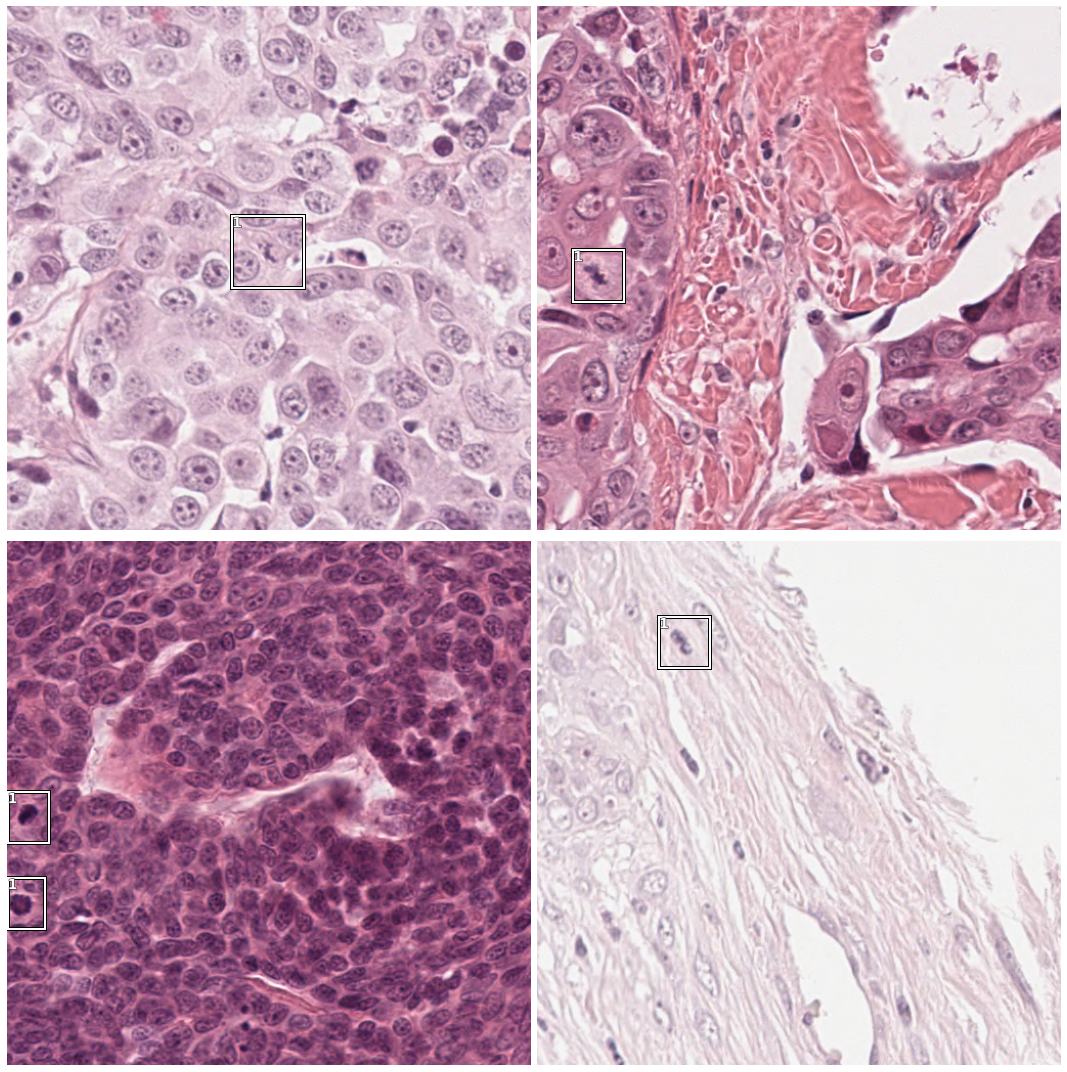

In [ ]:
data.show_batch(rows=2, ds_type=DatasetType.Train, figsize=(15,15))

In [ ]:
anchors = create_anchors(sizes=[(32,32)], ratios=[1], scales=[0.6, 0.7,0.8])

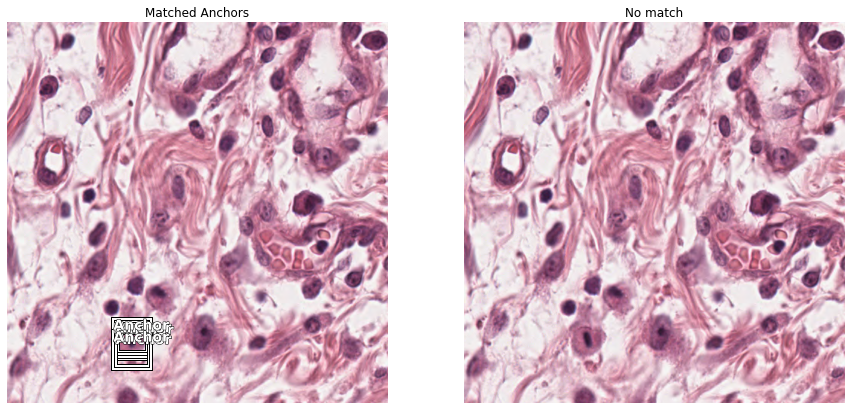

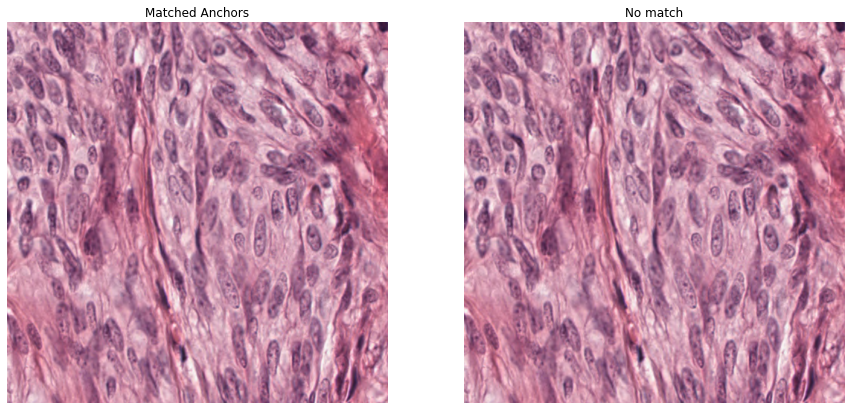

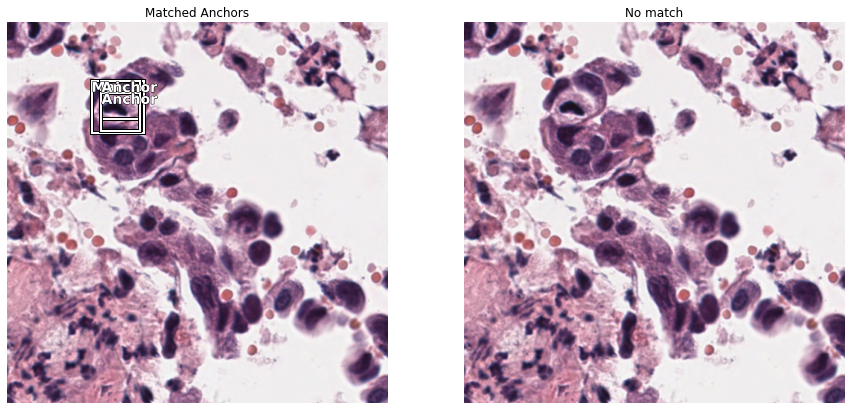

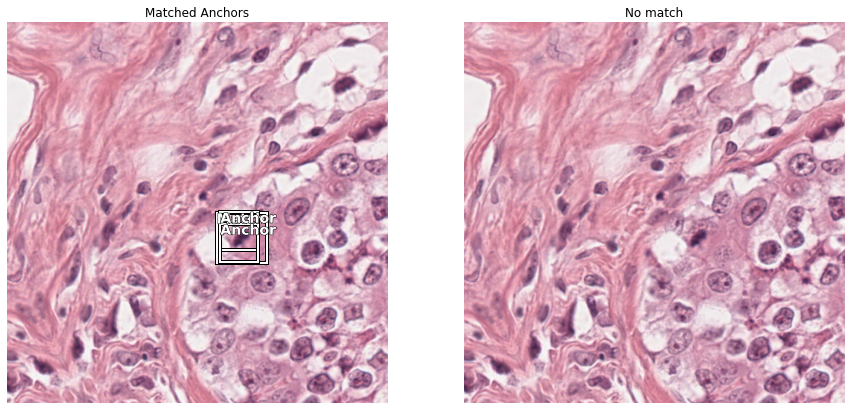

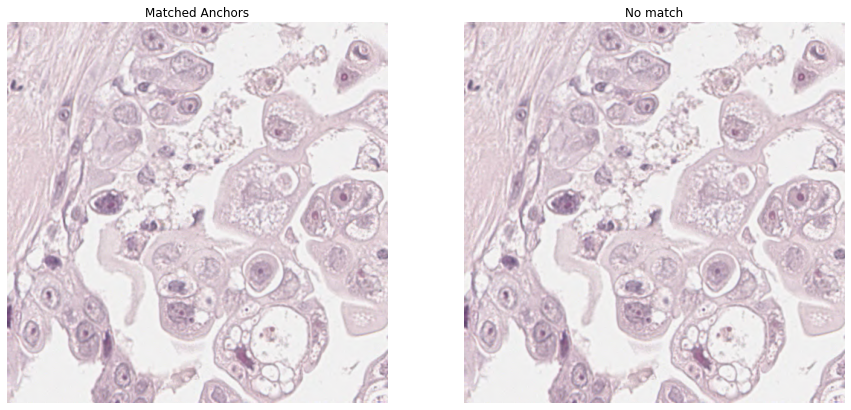

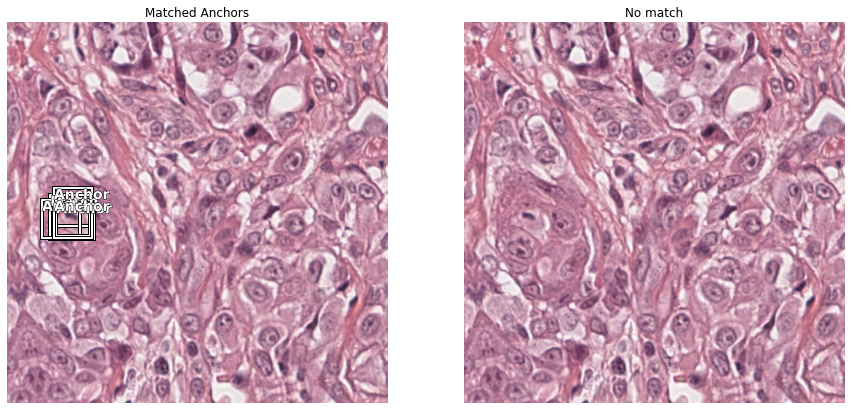

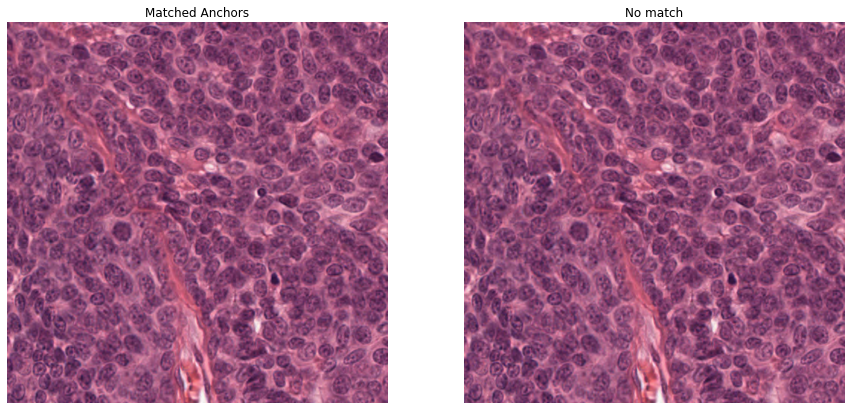

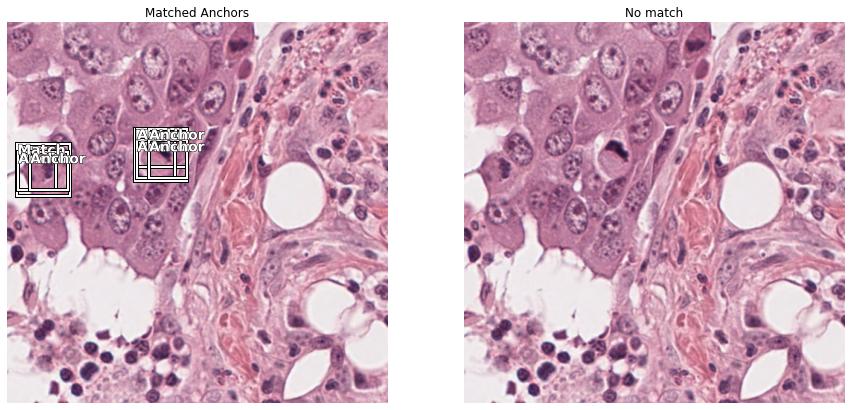

In [ ]:
not_found = show_anchors_on_images(data, anchors)

In [ ]:
crit = RetinaNetFocalLoss(anchors)

In [ ]:
encoder = create_body(models.resnet18, True, -2)
model = RetinaNet(encoder, n_classes=data.train_ds.c, n_anchors=3, sizes=[32], chs=128, final_bias=-4., n_conv=3)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
voc = PascalVOCMetric(anchors, size, [str(i-1) for i in data.train_ds.y.classes[1:]])
learn = Learner(data, model, loss_func=crit, callback_fns=[BBMetrics, ShowGraph], #BBMetrics, ShowGraph
                metrics=[voc]
               )

In [ ]:
learn.split([model.encoder[6], model.c5top5])
learn.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


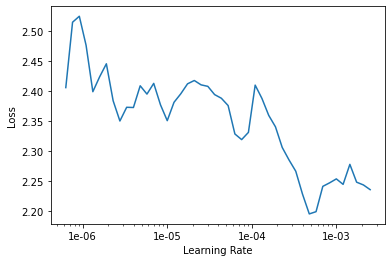

In [ ]:
learn.lr_find()
learn.recorder.plot()

GT: 100%|██████████| 2950/2950 [00:00<00:00, 3020.33it/s]


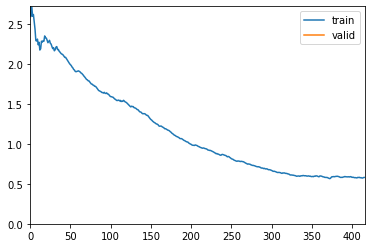

In [ ]:
learn.fit_one_cycle(1, 1e-4)

GT: 100%|██████████| 3078/3078 [00:01<00:00, 2681.12it/s]


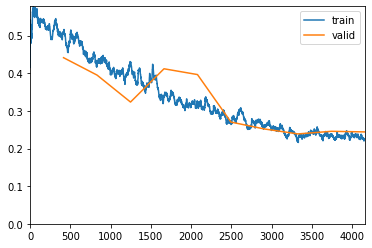

GT: 100%|██████████| 2972/2972 [00:00<00:00, 3371.16it/s]


In [ ]:
lr=1e-4
learn.fit_one_cycle(10, lr)#, callbacks=[SaveModelCallback(learn, every='improvement', monitor='AP-0', name='model')])

GT: 100%|██████████| 3005/3005 [00:00<00:00, 3287.17it/s]


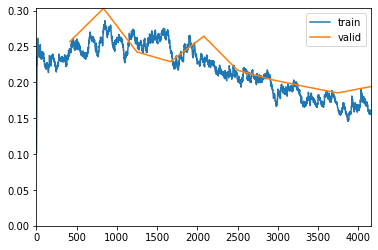

GT: 100%|██████████| 3103/3103 [00:00<00:00, 3467.78it/s]


In [ ]:
learn.unfreeze()
lr=1e-4

learn.fit_one_cycle(10, lr)

GT: 100%|██████████| 3059/3059 [00:00<00:00, 3213.48it/s]


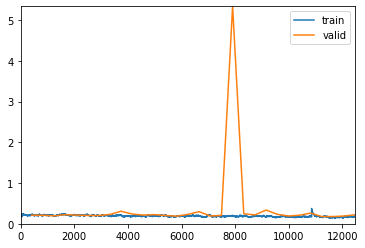

Better model found at epoch 0 with valid_loss value: 0.21139933168888092.


GT: 100%|██████████| 3076/3076 [00:00<00:00, 3431.85it/s]


Better model found at epoch 1 with valid_loss value: 0.20987816154956818.


GT: 100%|██████████| 2969/2969 [00:00<00:00, 3454.39it/s]


Better model found at epoch 2 with valid_loss value: 0.19502520561218262.


GT: 100%|██████████| 3115/3115 [00:00<00:00, 3277.50it/s]


Better model found at epoch 13 with valid_loss value: 0.18705672025680542.


GT: 100%|██████████| 3080/3080 [00:00<00:00, 3375.39it/s]


Better model found at epoch 26 with valid_loss value: 0.1772661656141281.


GT: 100%|██████████| 3085/3085 [00:00<00:00, 3149.94it/s]


In [ ]:
learn.unfreeze()
lr=1e-4

learn.fit(30, lr, callbacks=[SaveModelCallback(learn, every='improvement', name='model')])

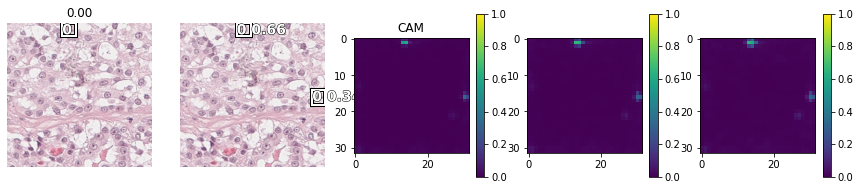

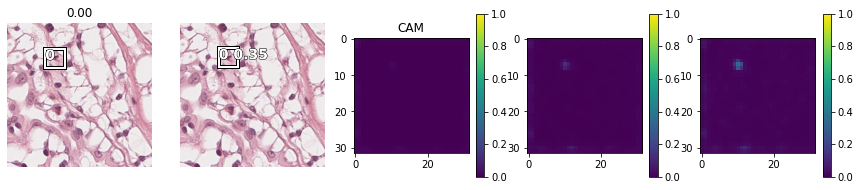

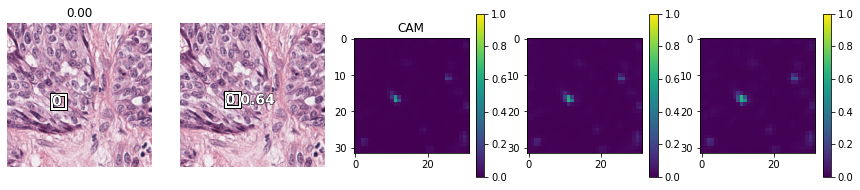

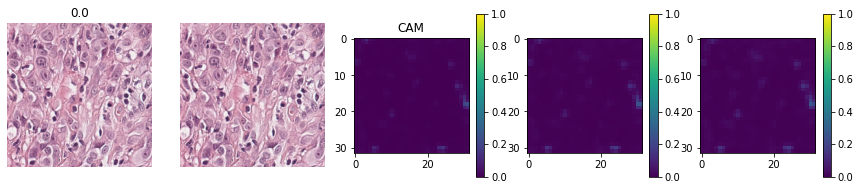

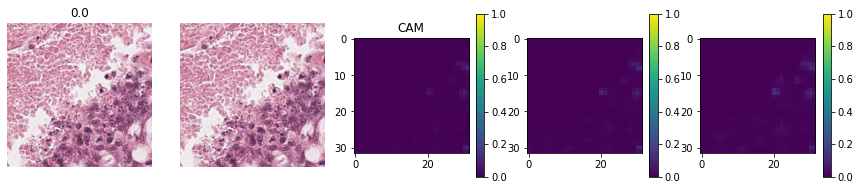

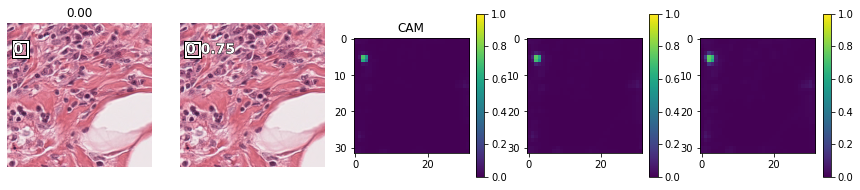

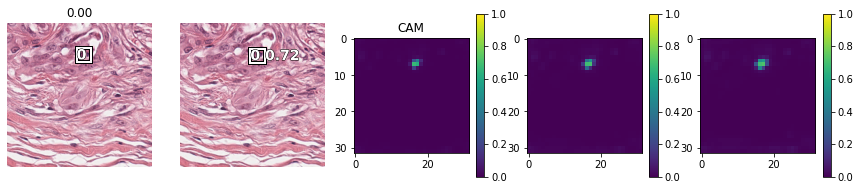

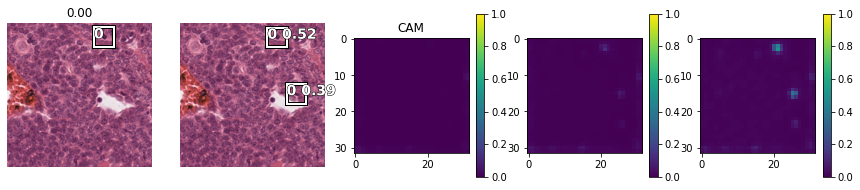

In [ ]:
slide_object_result(learn, anchors, detect_thresh=0.3, nms_thresh=0.2, image_count=10)

In [ ]:
ls

capstone_EDA.ipynb          lib/              RetinaNet-CMC-CODAEL.ipynb
capstone_EDA_nr.ipynb       model/            RetinaNet-CMC-MEL.ipynb
capstone_EDA_sv.ipynb       models/           RetinaNet-CMC-ODAEL.ipynb
databases/                  PatchClassifier/  sample_anno2.png
data_loader.py              __pycache__/      Setup.ipynb
Evaluation.ipynb*           README.md         title_CMC.png
Inference-RetinaNet-512.py  results/          WSI/


In [ ]:
learn.save('RetinaNet-CMC-CODAEL-512sh-batch1', with_opt=True)
learn.export("RetinaNet-CMC-CODAEL-512sh-b1.pth")

In [ ]:
torch.save(learn.model.state_dict(), "RetinaNet-CMC-CODAEL-512sh-batch1_statedict.pth")

In [ ]:
learn.data.stats

[tensor([0.7466, 0.5733, 0.6590]), tensor([0.1735, 0.2350, 0.1870])]

In [ ]:
ls

capstone_EDA.ipynb          README.md
capstone_EDA_nr.ipynb       results/
capstone_EDA_sv.ipynb       RetinaNet-CMC-CODAEL-512sh-b1.pth
databases/                  RetinaNet-CMC-CODAEL-512sh-batch1_statedict.pth
data_loader.py              RetinaNet-CMC-CODAEL.ipynb
Evaluation.ipynb*           RetinaNet-CMC-MEL.ipynb
Inference-RetinaNet-512.py  RetinaNet-CMC-ODAEL.ipynb
lib/                        sample_anno2.png
model/                      Setup.ipynb
models/                     title_CMC.png
PatchClassifier/            WSI/
__pycache__/


In [ ]:
ls ../

drive/  MITOS_WSI_CMC/  sample_data/


In [ ]:
ls ../drive

MyDrive/  Othercomputers/


In [ ]:
ls ../drive/MyDrive/FB_Shared

 FB_xAI_Systems_Diag.drawio
'Ideation: Automating Explainability in Healthcare.gdoc'
'Project Proposal: xAI in Healthcare.docx'
'Resources Links.gdoc'
'xAI_pathology_Student Project Form OBSOLETE.gdoc'


In [ ]:
cp *.pth ../drive/MyDrive/FB_Shared